# Universidade de Brasília - UnB

## Mestrado Profissional em Computação Aplicada - MPCA

Disciplina: **Análise Estatístia de Dados e Informações - AEDI**  
Professor: **João Gabriel de Moraes Souza**  
Aluno: **Felipe Schiavon de Oliveira** (matrícula: 20/0077104)

## Tarefa 2

**Gerar Exemplo Aplicado ou Simulado de uma Distribuição de Probabilidade**

Gerar um relatório com pelo menos um exemplo de uma distribuição de probabilidades apresentadas, bem como apresentar os principais conceitos da distribuição e seus parâmetros.

### Distribuição Contínua Uniforme

Uma variável $X$ possui distribuição uniforme contínua quando todos os valores no intervalo $[a, b]$ tem a mesma chance de ocorrer. Assim, a probabilidade de gerar qualquer ponto em um intervalo contido no espaço amostral é proporcional ao tamanho do intervalo.

Se $X$ é uma variável contínua uniforme no intervalo $ [a, b] $, ou seja, $ a  \le x  \le b $, teremos:

**Função densidade de probabilidade**  
$ fx(X = x) = \frac{1}{(b-a)} $

**Valor esperado**  
$ \mathbb{E}(X) = \frac{(a+b)}{2} $

**Variância**  
$ \mathbb{V}(X) = \frac{(b-a)^2}{12} $

## Simulação com valores aleatórios

In [1]:
# Importando pacotes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Geração de 2000 valores aleatórios entre -5.0 e 3.0
a = -5.0
b = 3.0
n = 2000
np.random.seed(7)
x = np.random.uniform(a,b,n)
print("Valores aleatórios entre -5 e 3:")
print(x)

Valores aleatórios entre -5 e 3:
[-4.38953369  1.23935034 -1.49272615 ...  2.50421963 -4.68517247
  0.18865356]


In [3]:
# Cálculo da função de probabilidade
func = 1/(b-a)
print("Valor da probabilidade:", func)

Valor da probabilidade: 0.125


In [4]:
# Cálculo do valor esperado
vesp = (a+b)/2
print("Valor esperado:", vesp)

Valor esperado: -1.0


In [5]:
# Cálculo da variância
var = (b-a)**2/12
print("Variância:", round(var, 2))

Variância: 5.33


In [6]:
# Criando valores da probabilidade da distribuição uniforme contínua para valores de X
def dunif(x, minimo=0, maximo=1):
    from scipy.stats import uniform
    result=uniform.pdf(x=x,loc=minimo,scale=maximo-minimo)
    return result

seq = dunif(x, a, b)

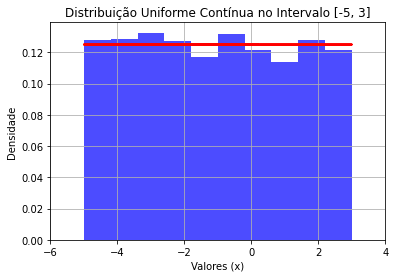

In [7]:
# Criando o gráfico do histograma e da curva de probabilidade
plt.hist(x, density=True, facecolor='blue', alpha=0.7)
plt.plot(x, seq, linewidth=2, color='r')

# Aumentando limite à esquerda e à direita do eixo das ordenadas e inserindo grid
plt.xlim(right=4)
plt.xlim(left=-6)
plt.grid(True)

# Mostrando o gráfico
plt.title("Distribuição Uniforme Contínua no Intervalo [-5, 3]")
plt.xlabel("Valores (x)")
plt.ylabel("Densidade")
plt.show()

O histograma representa a distribuição dos valores da variável $ X $.

A curva vermelha (que no caso específico é uma reta) representa a probabilidade de ocorrência dos valores da variável $ X $, que é a mesma considerando tratar-se de uma distribuição uniforme contínua.

Dessa forma, a área abaixo da linha vermelha corresponde à probabilidade total, ou seja, a 1. Esse valor é calculado usando a integral.

### Cálculo da integral

In [8]:
# Importando pacotes para cálculo da integral e definindo parâmetros
import warnings
warnings.filterwarnings('ignore')
from sympy import *
init_printing()
var('z')

In [9]:
# Definindo a função
f = Lambda(z, func)
f

In [10]:
# Calculando a integral
print("Resultado da integral:")
integrate(f(z), (z, a, b))

Resultado da integral:


### Curva de densidade de probabilidade contínua acumulada

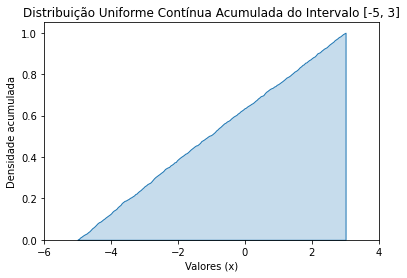

In [11]:
# Criando o gráfico com a curva de densidade de probabilidade contínua acumulada
ax2 = sns.kdeplot(x, shade=None, cumulative=True, fill=True, bw_method=0.001)
ax2.set(title='Distribuição Uniforme Contínua Acumulada do Intervalo [-5, 3]',
        xlabel='Valores (x)', ylabel='Densidade acumulada')

# Aumentando limite à esquerda e à direita do eixo das ordenadas

plt.xlim(right=4)
plt.xlim(left=-6)

# Mostrando o gráfico
plt.show()

A curva representa a distribuição acumulada da probabilidade dos valores da variável $ X $, variando de $ 0 $ (menor valor) a $ 1 $ (maior valor).

## Exemplo aplicado

- Seja $ X $ a frequência de uma nota musical.
- $ X $ é medida em hertz (Hz).
- A variável assume valores no intervalo **[132.0, 264.0]**.
- Qual a probabilidade de uma nota aleatória corresponder à nota Sol, sabendo que a essa nota musical corresponde à frequência de 197,736 Hz, variando 5,544 Hz para baixo e 5,874 Hz para cima.

In [12]:
# Definindo intervalo total
lim_i_t = 132.0
lim_s_t = 264.0

In [13]:
# Cálculo da função de probabilidade
prob_total = 1/(lim_s_t-lim_i_t)
print("Valor da probabilidade:", round(prob_total, 4))

Valor da probabilidade: 0.0076


In [14]:
# Cálculo do intervalo da nota Sol
freq = 197.736
lim_i_G = freq - 5.544
lim_s_G = freq + 5.874
print("Frequência da nota Sol:", round(freq, 3))
print("Limite inferior da nota Sol:", round(lim_i_G, 3))
print("Limite superior da nota Sol:", round(lim_s_G, 3))

Frequência da nota Sol: 197.736
Limite inferior da nota Sol: 192.192
Limite superior da nota Sol: 203.61


Considerando o intervalo total de [132.0, 264.0], qual a probabilidade de uma nota aleatória estar entre [192.192, 203.61], que corresponde à nota Sol?

In [15]:
# Definindo parâmetros
var('w')

# Definindo a função
g = Lambda(w, prob_total)
g

In [16]:
# Calculando a integral
print("Resultado da integral:")
integrate(g(w), (w, lim_i_G, lim_s_G))

Resultado da integral:


Assim, a probabilidade de uma nota aleatória corresponder à nota Sol, é de 0.0865.

### Criando o gráfico da distribuição de probabilidade

In [17]:
# Geração de 1000 valores sequenciais e contínuos entre 132.0 Hz e 264.0 Hz
n = 1000
np.random.seed(7)
G = np.linspace(lim_i_t, lim_s_t, 1000, True)
print("Valores contínuos do intervalo total:")
print(G)

Valores contínuos do intervalo total:
[132.         132.13213213 132.26426426 132.3963964  132.52852853
 132.66066066 132.79279279 132.92492492 133.05705706 133.18918919
 133.32132132 133.45345345 133.58558559 133.71771772 133.84984985
 133.98198198 134.11411411 134.24624625 134.37837838 134.51051051
 134.64264264 134.77477477 134.90690691 135.03903904 135.17117117
 135.3033033  135.43543544 135.56756757 135.6996997  135.83183183
 135.96396396 136.0960961  136.22822823 136.36036036 136.49249249
 136.62462462 136.75675676 136.88888889 137.02102102 137.15315315
 137.28528529 137.41741742 137.54954955 137.68168168 137.81381381
 137.94594595 138.07807808 138.21021021 138.34234234 138.47447447
 138.60660661 138.73873874 138.87087087 139.003003   139.13513514
 139.26726727 139.3993994  139.53153153 139.66366366 139.7957958
 139.92792793 140.06006006 140.19219219 140.32432432 140.45645646
 140.58858859 140.72072072 140.85285285 140.98498498 141.11711712
 141.24924925 141.38138138 141.51351351

In [18]:
# Extraindo índices do intervalo
import pandas as pd
G_series = pd.Series(G)
index_G = G_series.loc[(G_series>192.192) & (G_series<203.61)].index
index_G

Int64Index([456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
            469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
            482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
            495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
            508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
            521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
            534, 535, 536, 537, 538, 539, 540, 541],
           dtype='int64')

In [19]:
# Criando série com os valores da probabilidade 0.0076 entre 192.192 e 203.61
prob_G = pd.Series([0] * 1000)
prob_G.iloc[index_G]=prob_total

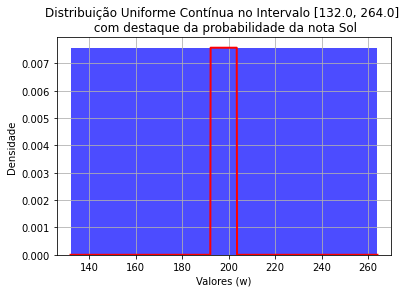

In [20]:
# Criando o gráfico do histograma e da curva de probabilidade
plt.hist(G, density=True, facecolor='blue', alpha=0.7)
plt.plot(G, prob_G, linewidth=2, color='r')

# Aumentando limite à esquerda e à direita do eixo das ordenadas e inserindo grid
plt.xlim(right=270)
plt.xlim(left=126)
plt.grid(True)

# Mostrando o gráfico
plt.title("Distribuição Uniforme Contínua no Intervalo [132.0, 264.0] \n com destaque da probabilidade da nota Sol")
plt.xlabel("Valores (w)")
plt.ylabel("Densidade")
plt.show()

A área da linha vermelha corresponde à probabilidade de obter a nota Sol (frequência entre 192.192 e 203.61 Hz) a partir de qualquer nota na escala musical. Conforme calculado acima, essa área corresponde à integral do intervalo: 0.0865. 